#####  _Implement_ K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute
##### confusion matrix, accuracy, error rate, precision and recall on the given dataset

In [ ]:
import pandas as pd, numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv('Social_Network_Ads.xls')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
sd = StandardScaler()

In [ ]:
x = data.drop('Purchased',axis=1)
y = data['Purchased']

In [ ]:
x.shape , y.shape

((400, 4), (400,))

In [ ]:
x [['Age','EstimatedSalary']] = sd.fit_transform(x[['Age','EstimatedSalary']])

In [ ]:
enc = LabelEncoder()
x['Gender'] = enc.fit_transform(x['Gender'])


In [ ]:
x = x.drop('User ID',axis=1)
x.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(x_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
accuracy = knn.score(x_test,y_test)
print('Accuracy :',accuracy)

Accuracy : 0.85


In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



In [ ]:
confusion_matrix(y_test,y_pred)

array([[39,  9],
       [ 3, 29]], dtype=int64)

In [ ]:
error = 1 - accuracy
print('Error_rate : ', error)

Error_rate :  0.15000000000000002


<Axes: >

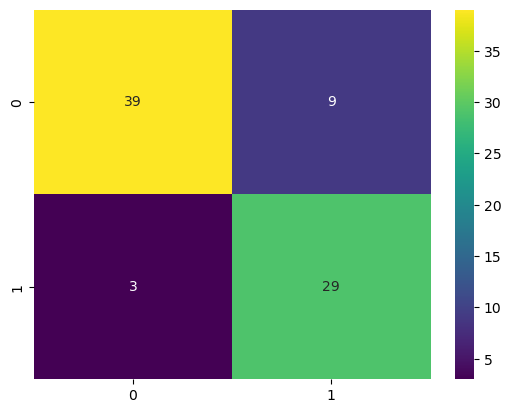

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')